In [12]:
# import numpy as np
# import cv2

import pylab as plt
# import matplotlib as mpl

import tifffile as tiff

import os

%load_ext autoreload
%autoreload 2

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Подгрузка данных

In [2]:
dir_path = './data'
filenames = os.listdir(dir_path)

In [3]:
data = tiff.imread(os.path.join(dir_path, filenames[0]))

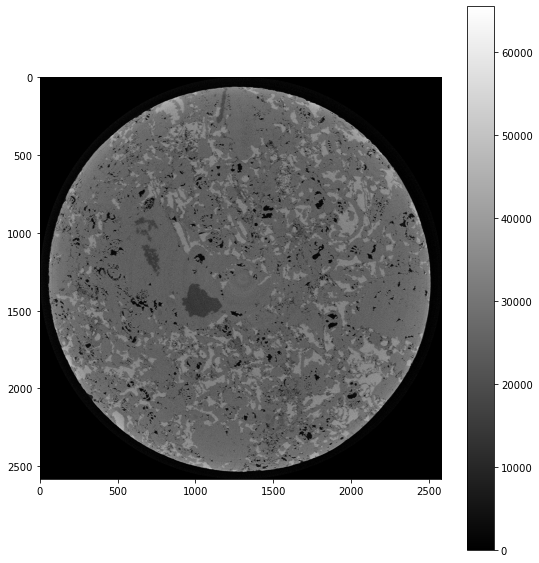

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 10))
im = plt.imshow(data, aspect='equal', cmap='gray')
plt.colorbar(im)
# Drawing_uncolored_circle = plt.Circle( (1291, 1291 ),
#                                       1220,
#                                       fill=False,
#                                       color='r')
# axs.add_artist( Drawing_uncolored_circle )

# Заполнение краевых значений NaN

In [9]:
nan_mask = get_mask()
filled_by_nan_data = fill_by_nan(data, nan_mask)

# Масштабирование

In [10]:
data_scaled = std_scaler(filled_by_nan_data)

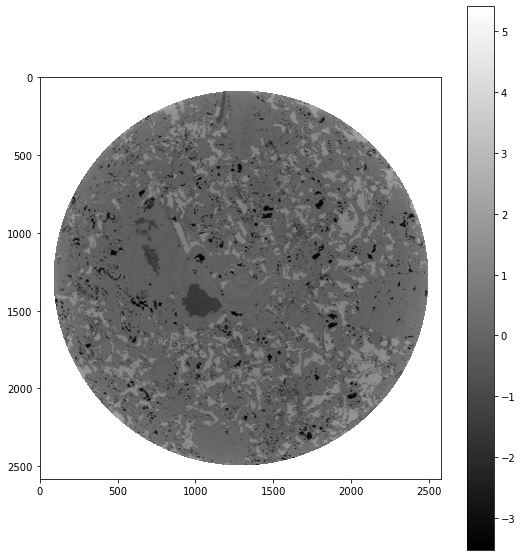

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 10))
im = plt.imshow(data_scaled, aspect='equal', cmap='gray')
plt.colorbar(im)

# Сглаживание

In [12]:
data_without_nan = fill_nan(data_scaled)
data_blur = cv2.GaussianBlur(data_without_nan, (3,3), 0)

<IPython.core.display.Javascript object>


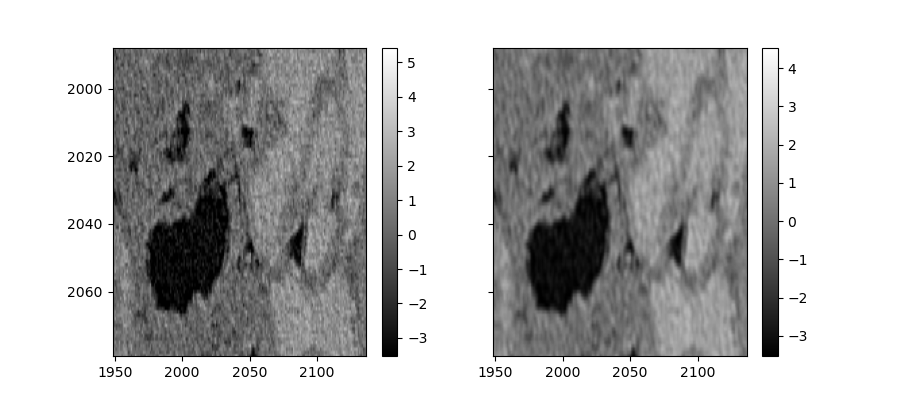

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data_scaled, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(data_blur, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1])

# Выделение границ

In [17]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=data_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobelx = fill_by_nan(sobelx, nan_mask)
sobely = cv2.Sobel(src=data_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobely = fill_by_nan(sobely, nan_mask)

<IPython.core.display.Javascript object>


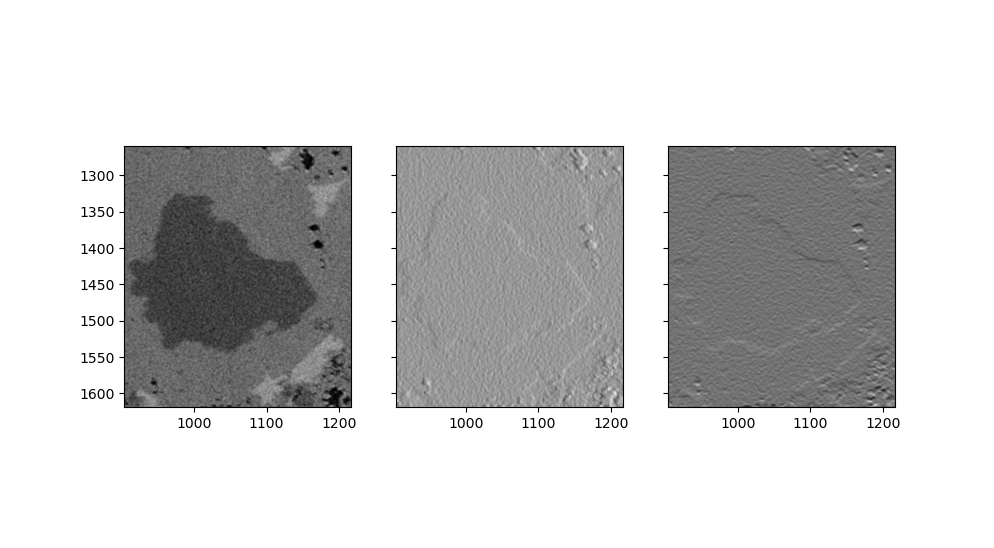

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data_blur, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(sobelx, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[1])

im = axs[2].imshow(sobely, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[2])

# Демо

In [8]:
dir_path = './data'
filenames = os.listdir(dir_path)

In [9]:
data = tiff.imread(os.path.join(dir_path, filenames[0]))

In [10]:
data_blur, sobelx, sobely = prepare_utils.calculate(data)

<IPython.core.display.Javascript object>


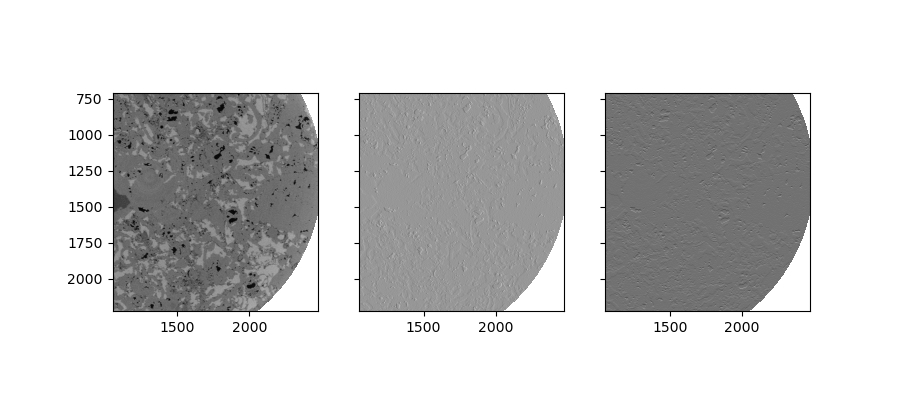

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data_blur, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(sobelx, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[1])

im = axs[2].imshow(sobely, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[2])

In [4]:
from tqdm.notebook import tqdm

In [5]:
data_blur_list = []
sobelx_list = []
sobely_list = []
for i, filename in enumerate(tqdm(filenames)):
    data = tiff.imread(os.path.join(dir_path, filenames[0]))
    data_blur, sobelx, sobely = prepare_utils.calculate(data)
    data_blur_list.append(data_blur)
    sobelx_list.append(sobelx)
    sobely_list.append(sobely)

  0%|          | 0/484 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [7]:
import tifffile as tiff

import os

import prepare_utils